## Movies data

### Explore and clean the data
---

In [1]:
####  Import statements
import pandas as pd

df = pd.read_csv("cost_revenue_dirty.csv")
df.sample(5)    # Checking a random sample of 5

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1646,2568,7/13/2001,Legally Blonde,"$18,000,000","$141,809,235","$96,493,426"
4060,1368,12/25/2011,Extremely Loud and Incredibly Close,"$40,000,000","$55,247,881","$31,847,881"
1052,4048,1/30/1998,Zero Effect,"$5,000,000","$2,080,693","$2,080,693"
2091,1412,9/26/2003,Duplex,"$40,000,000","$10,070,651","$9,652,000"
4580,4822,3/21/2014,God’s Not Dead,"$1,150,000","$63,777,092","$60,755,732"


#### Initial checks

In [2]:
#### Initial checks
df.head()
df.shape
df.columns      # Checks are fine
df.dtypes       # Last three usd columns need to be converted.

#Adjustments

    # Convert the currency to numbers
columns = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns:
    df[column]= df[column].astype(str).str.replace("$", "")
    df[column]= df[column].astype(str).str.replace(",", "")
    df[column] =pd.to_numeric(df[column])

    # convert the date to datetime
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
df.dtypes


Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [3]:
# Secondary checks
    # check for missing data
df.isna().sum()
        # No missing data so no changes needed

    # checks for duplicates
        # Helps you to see them ( keep= false mean to keep all, can do first and the last.)
df [df[["Movie_Title","Release_Date"]].duplicated(keep = False)].sort_values("Movie_Title")
            # Intially did moveit title but the release dates are different.
            ## When accounting for release date and movie name there is only one duplicates
df[["Movie_Title", "Release_Date"]].duplicated().value_counts()
            # Only one item that identical

df.drop_duplicates(subset =["Movie_Title", "Release_Date"], keep ="first", inplace = True)
df[["Movie_Title", "Release_Date"]].duplicated().value_counts()


False    5390
Name: count, dtype: int64

#### Descriptive stats

##### Challenge 1
What is the average production budget of the films in the data set?

What is the average worldwide gross revenue of films?

What were the minimums for worldwide and domestic revenue?

Are the bottom 25% of films actually profitable or do they lose money?

What are the highest production budget and highest worldwide gross revenue of any film?

How much revenue did the lowest and highest budget films make?

In [4]:
df.head()
pd.set_option('display.float_format', '{:,.2f}'.format)
df.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00",5390,"5,390.00","5,390.00","5,390.00"
mean,"2,695.52",2003-09-19 08:04:21.818181888,"31,119,487.81","88,871,907.20","41,243,169.82"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.25",1999-12-02 06:00:00,"5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50",2006-06-23 00:00:00,"17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75",2011-11-23 00:00:00,"40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.14",NaN,"40,525,356.93","168,469,037.10","66,033,082.74"


### Analysing data
---


#### Boolean indexing ---- way to make multiple comparisons

In [5]:
### Use loc and boolean indexing to work out the ones where domestic ==0 and worldwide !=0
international_releases =  df.loc[(df["USD_Domestic_Gross"]== 0) & (df["USD_Worldwide_Gross"]!=0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


#### Using Query -- filter by multiple conditions. ( Same thing as before but just using strings)

In [11]:
international_releases2 =  df.query("USD_Domestic_Gross==0  and USD_Worldwide_Gross!=0")
international_releases2.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


####  Challenge
Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.



Identify which films were not released yet as of the time of data collection (May 1st, 2018).

How many films are included in the dataset that have not yet had a chance to be screened in the box office?

Create another DataFrame called data_clean that does not include these films.

In [6]:
#### Filter by the date
scrape_date = pd.Timestamp("2018-05-01")                        # Convert the date you look for into datetime
future_release = df[df["Release_Date"] > scrape_date]           # make the comparison to the dates
future_release.head()


## Removing these from the list
ddata_clean  = df.drop(future_release.index)                    # Drop the values from their index values.

### Visualise data
---

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


#### Creating scatterplots

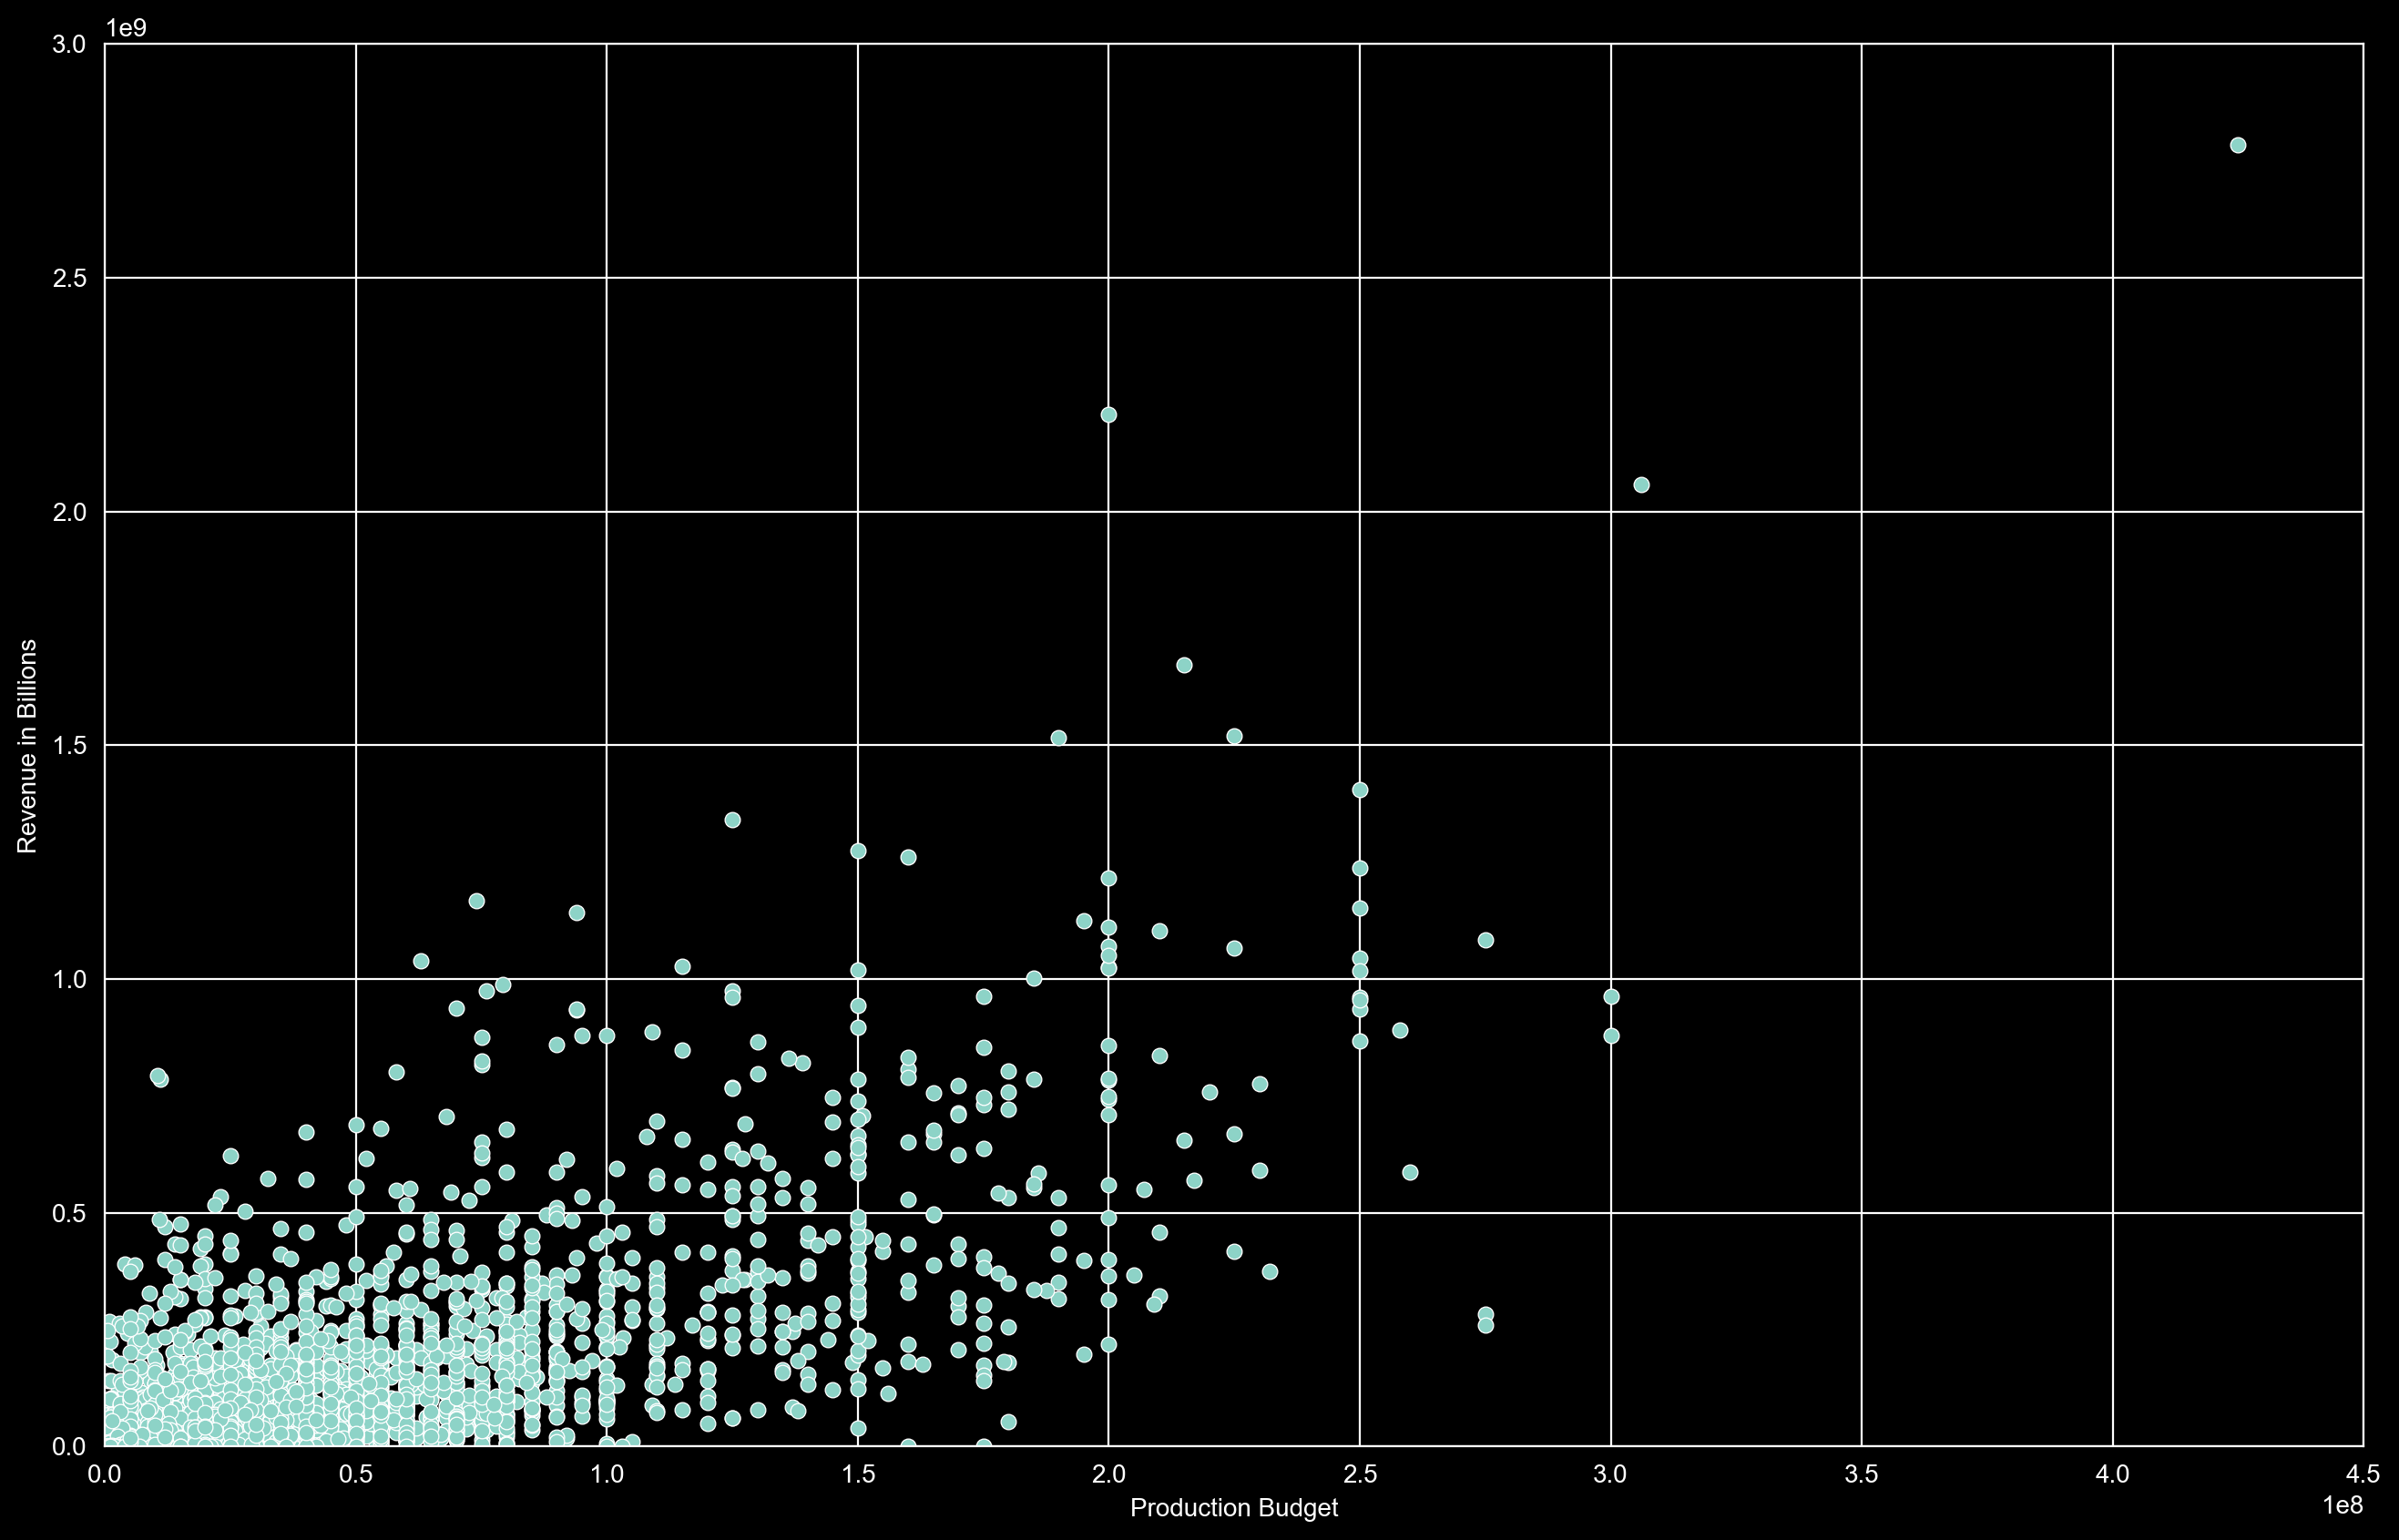

In [10]:
##### Seaborn is built on top of matplotlib so you can add extra arguments
plt.figure(figsize= (16, 10), dpi= 200)
ax  = sns.scatterplot( data = df,
                 x= "USD_Production_Budget",
                 y= "USD_Worldwide_Gross")

ax.set(ylim = (0, 3000000000),
       xlim= (0, 450000000),
       xlabel ="Production Budget",
       ylabel = "Revenue in Billions")



plt.show()

#### You can easily convert this into a bubble chart with three extra arguments

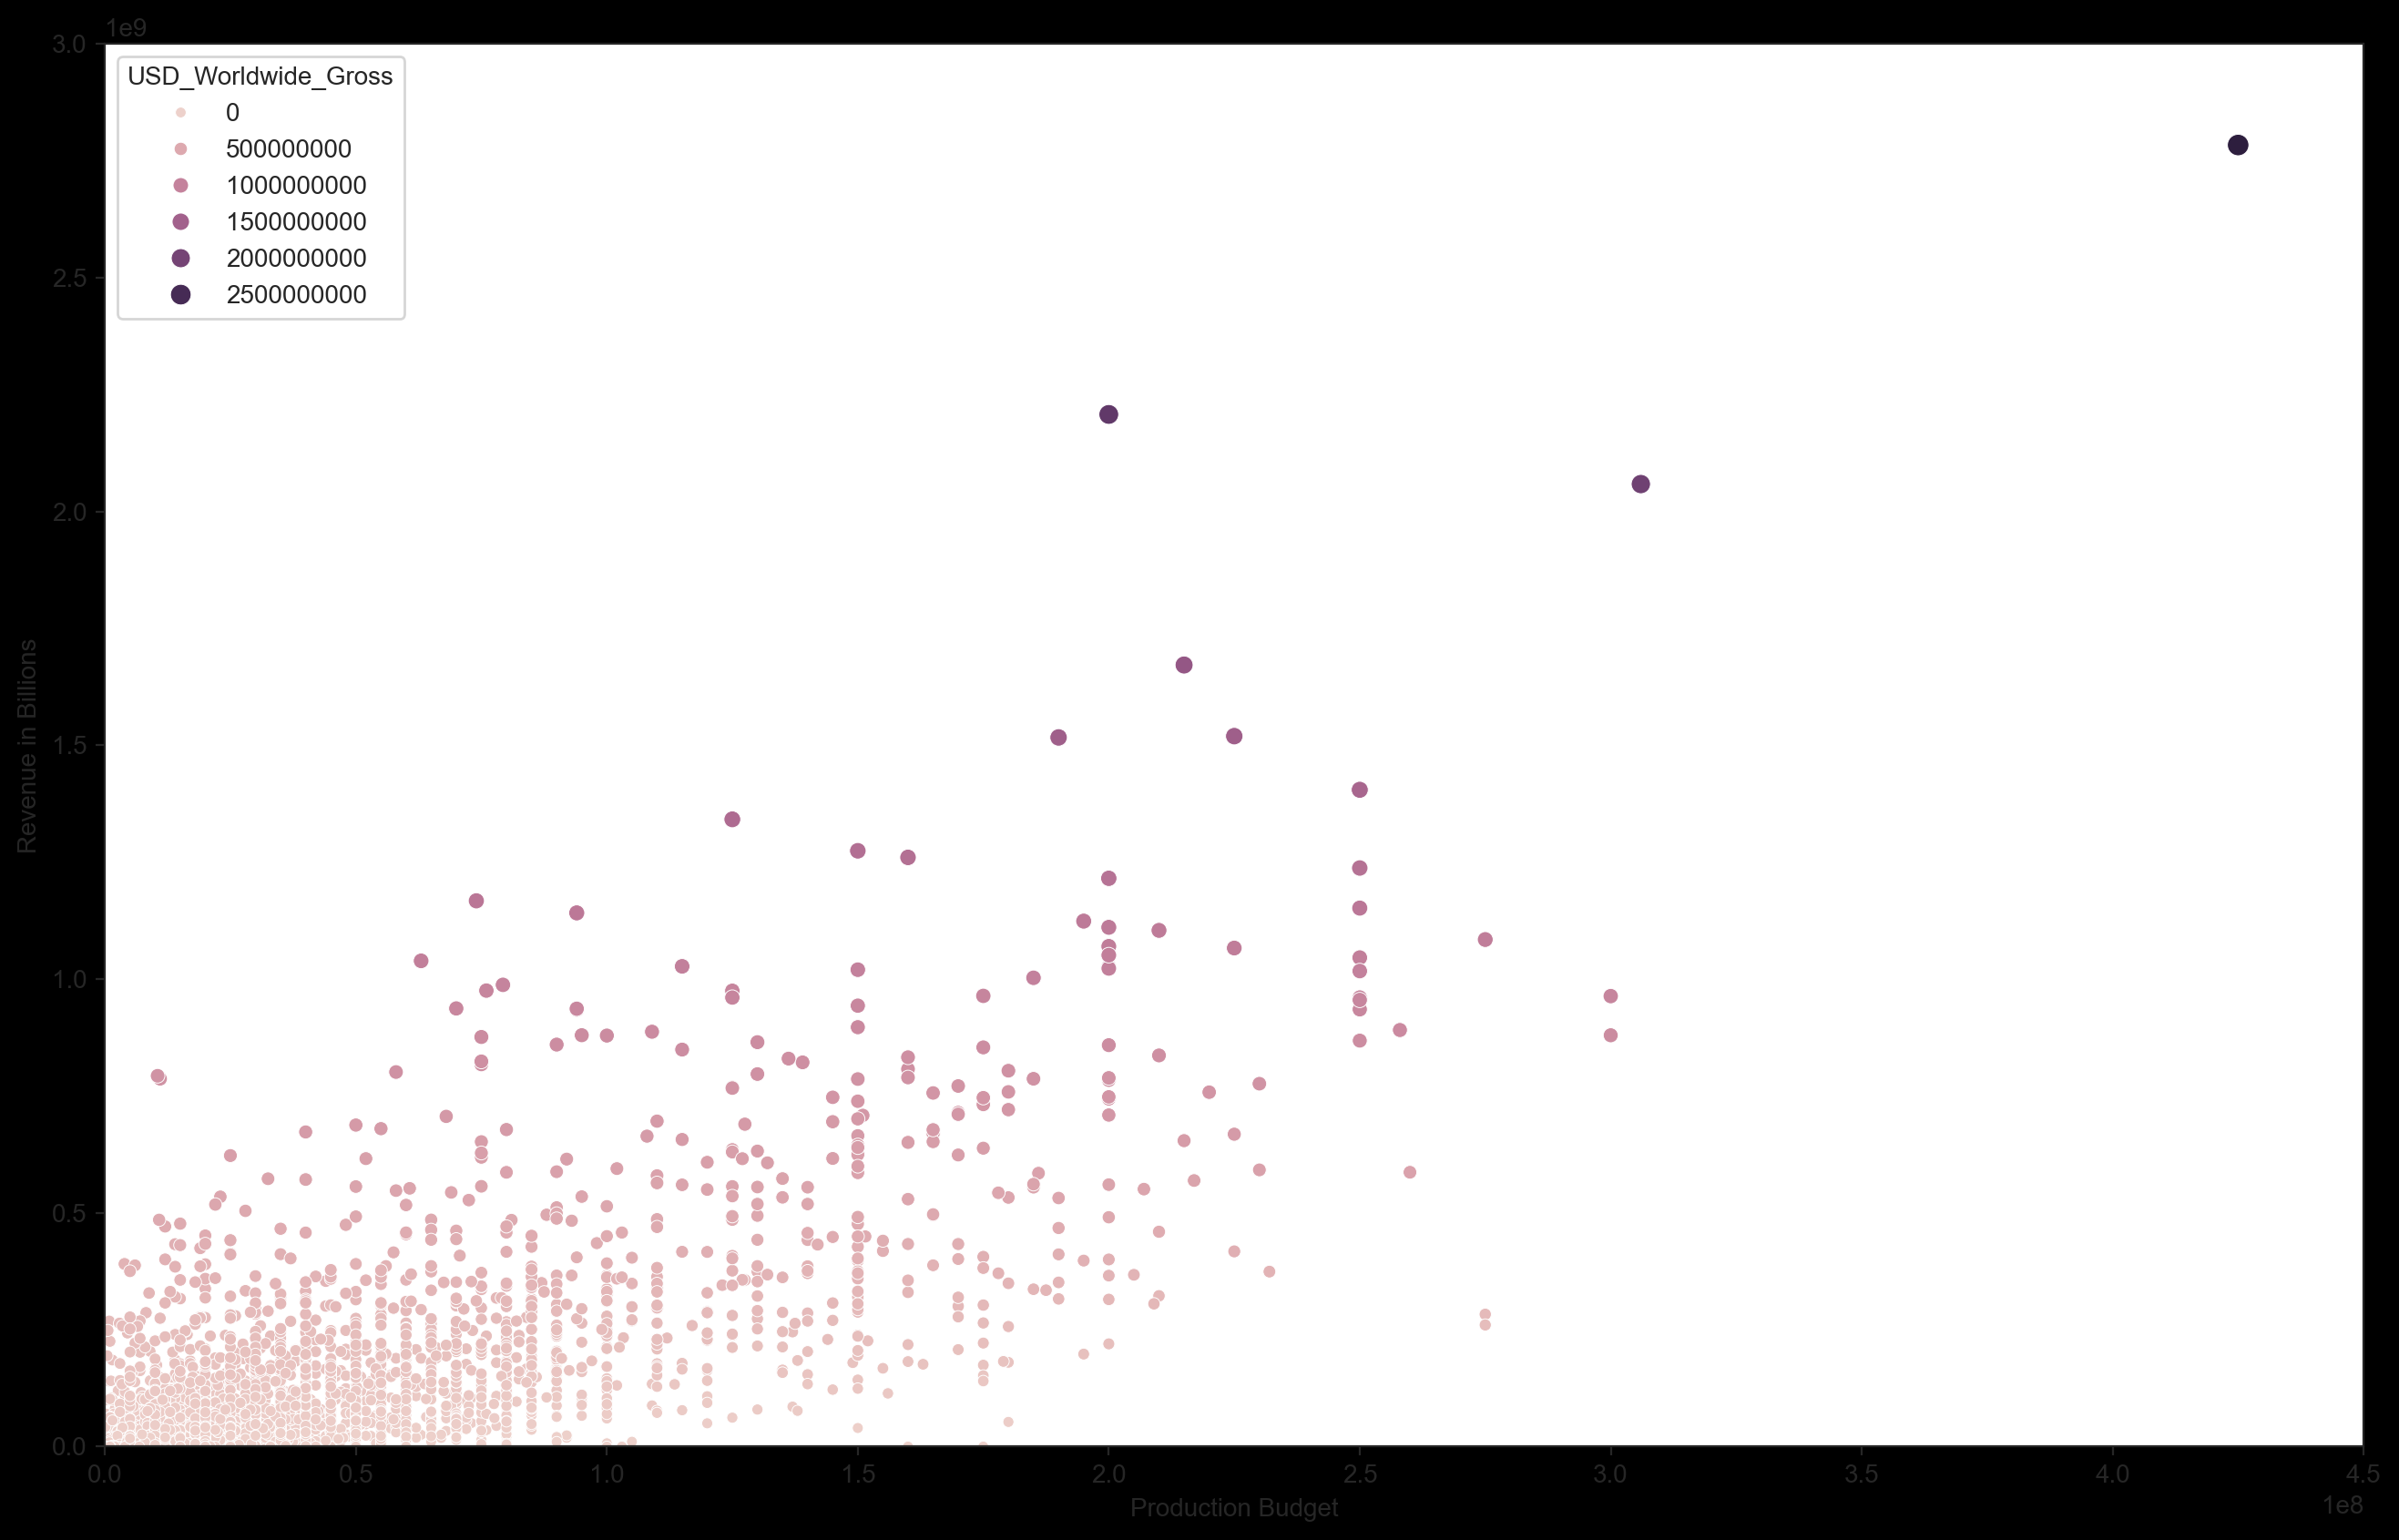

In [11]:
plt.figure(figsize=(16, 10), dpi = 200)
sns.set_style("ticks")                                  # Extra graph type fucntionality
ax= sns.scatterplot(data = df,
                    x= "USD_Production_Budget",
                    y = "USD_Worldwide_Gross",
                    hue = "USD_Worldwide_Gross",        # Colour depends on
                    size ="USD_Worldwide_Gross")        # dOTSIZE
ax.set(ylim = (0, 3000000000),
       xlim= (0, 450000000),
       xlabel ="Production Budget",
       ylabel = "Revenue in Billions")



plt.show()

#### Challenge for the bubble chart

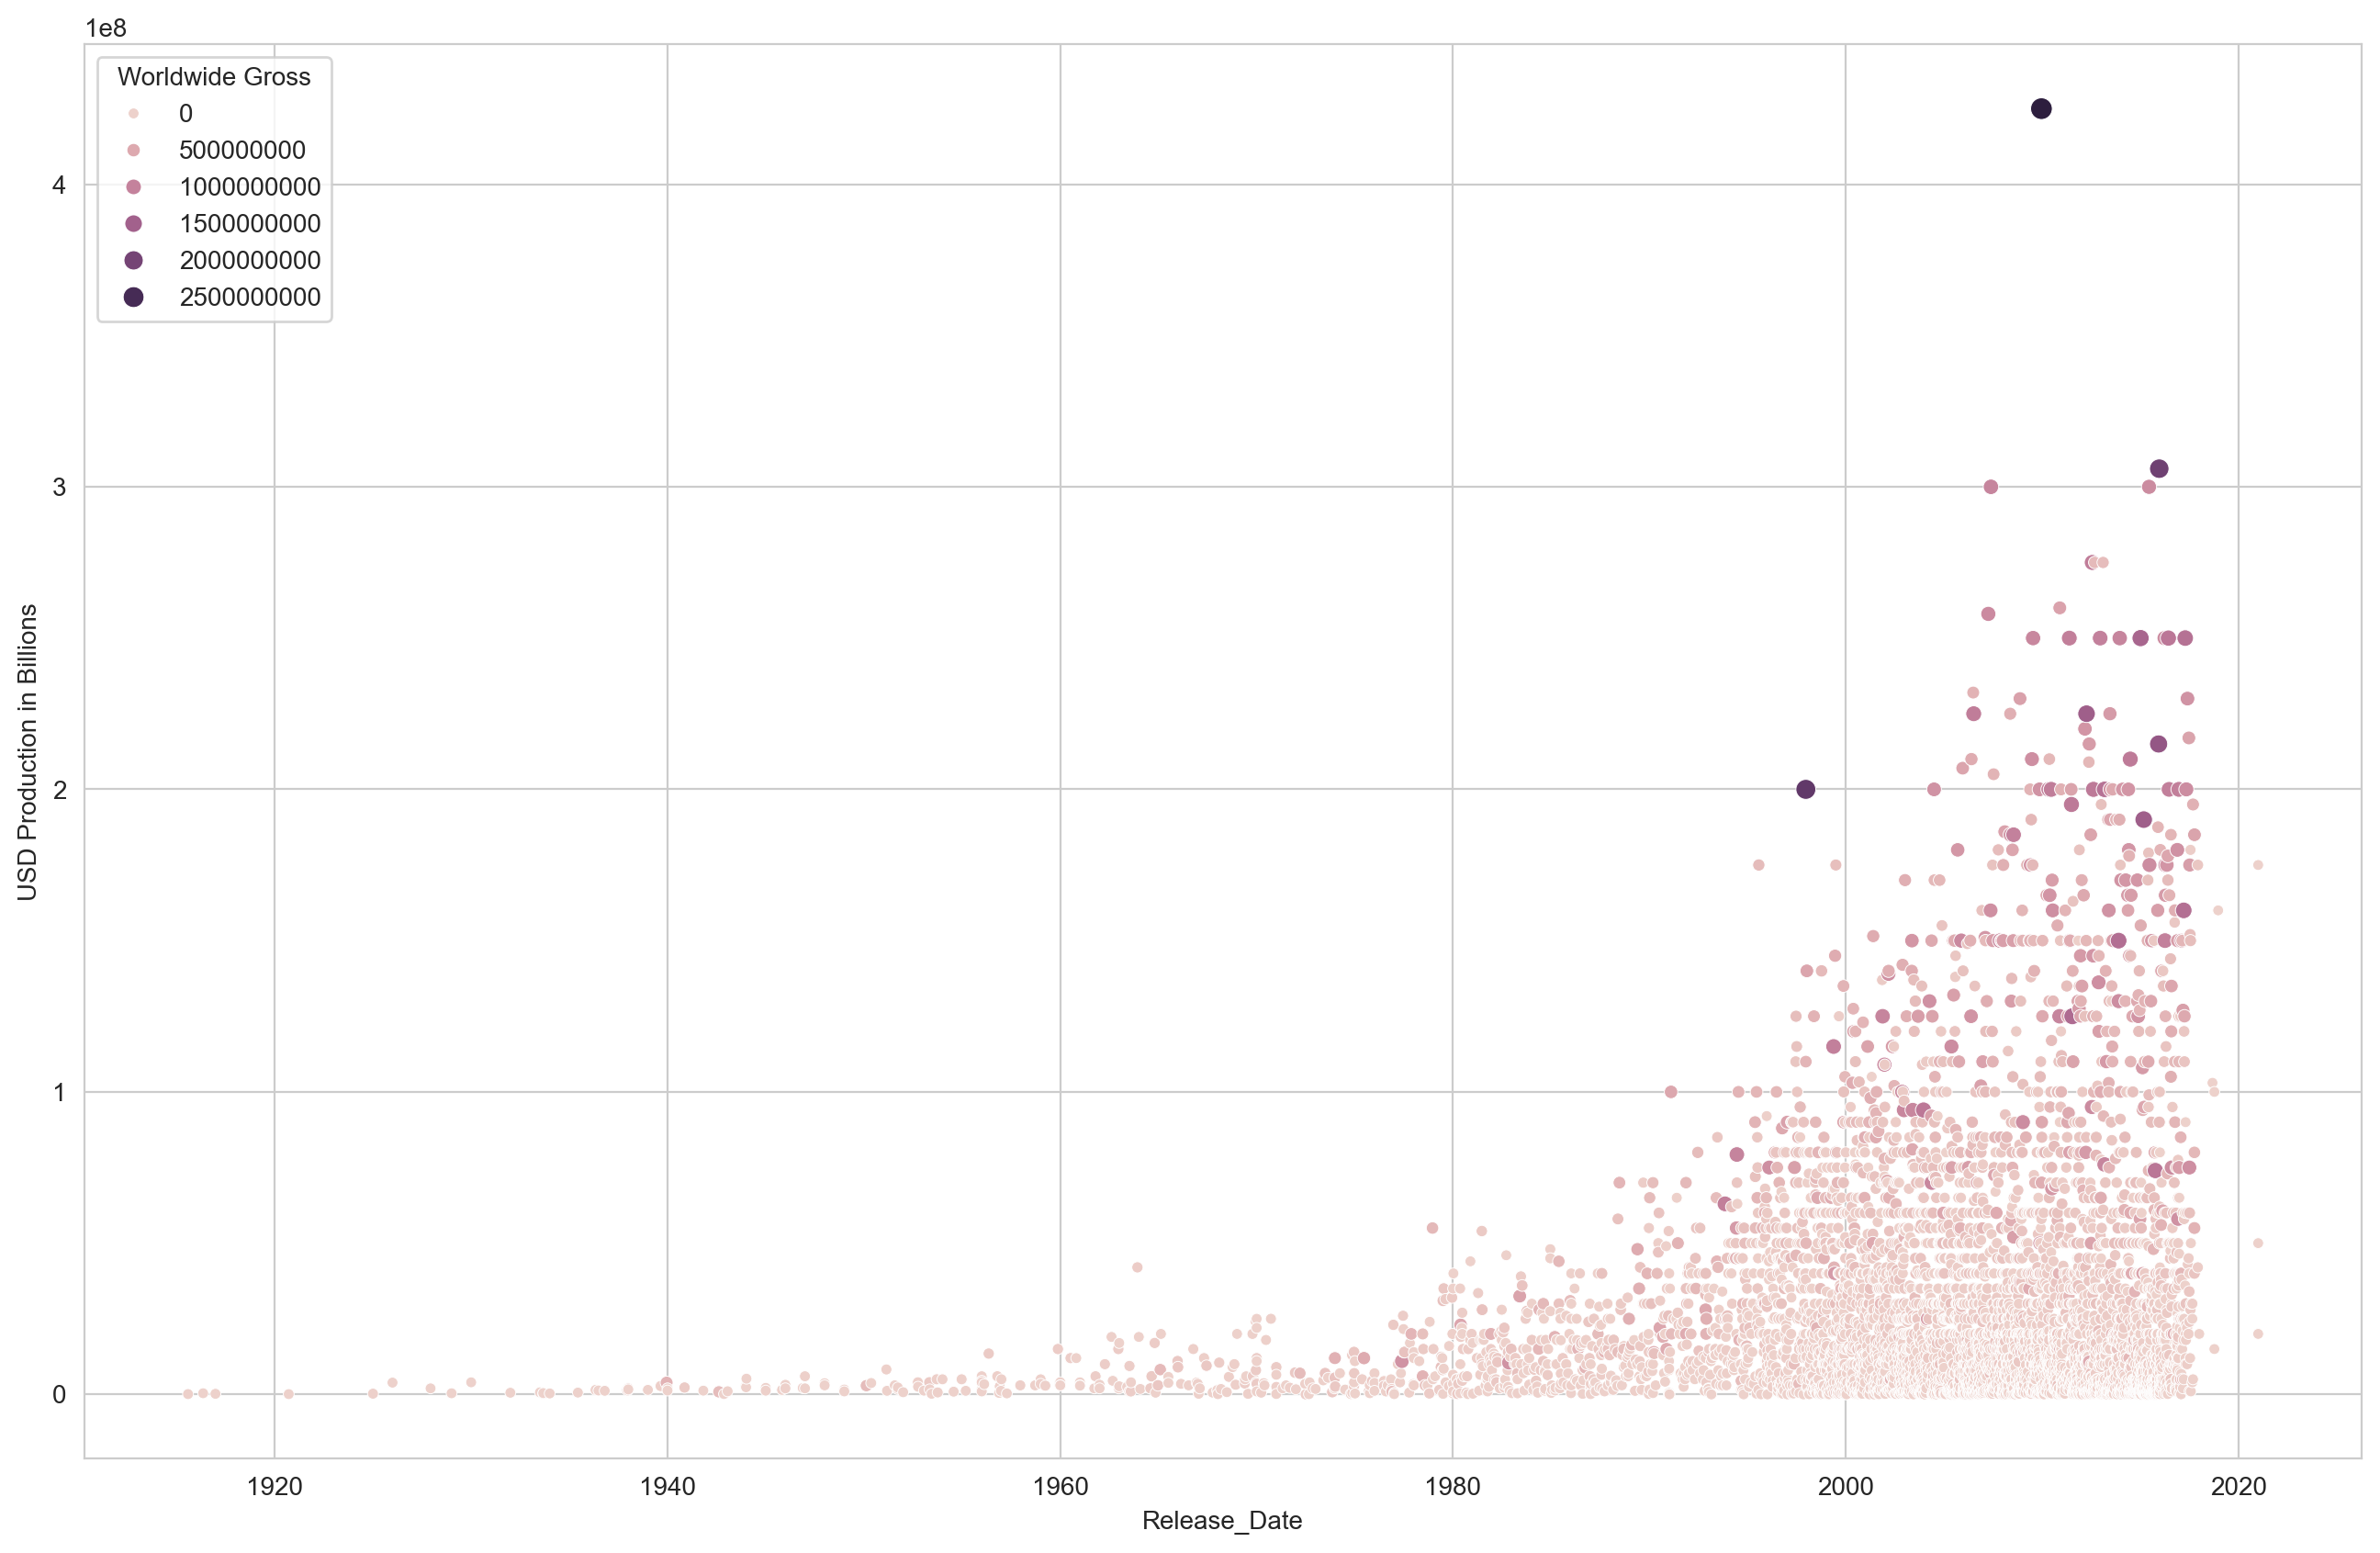

In [12]:
plt.figure(figsize=(16, 10), dpi = 200)
sns.set_style("whitegrid")

ax =  sns.scatterplot(data = df,
                      x = "Release_Date",
                      y = "USD_Production_Budget",
                      hue= "USD_Worldwide_Gross",
                      size ="USD_Worldwide_Gross")

ax.set(xlabel= "Release_Date",
       ylabel = "USD Production in Billions")
ax.legend(loc="upper left", title= "Worldwide Gross")
plt.show()

### Use of the datetime index to split months, years and days
---

In [19]:
df["Release_Date"].dtypes       ## So it is a datetime index #
years =df["Release_Date"].dt.year   # the container is datetime but not the actual values.
                                    ## Convert the values to date time and then access the year
# or
df["Release_Date"] = pd.DatetimeIndex(df["Release_Date"])           # Converts the container to a datetime object.
years=  df["Release_Date"].dt.year                                  ## Converts the values to the data type

## Convert the years to decades.
years =years//10
decades= years*10
# Adding a new columns at the end with the decades:
df["Decades"]=decades

o#### Challenge
Create two new DataFrames: old_films and new_films

old_films should include all the films before 1970 (up to and including 1969)

new_films should include all the films from 1970 onwards

How many of our films were released prior to 1970?

What was the most expensive film made prior to 1970?

In [37]:
#### Total number of old and new films
old_films =df[df["Decades"]<1970]
new_films = df[df["Decades"]>=1970]

# and_fils = df[(df["Decades"] > 1970) & (df["Decades"] < 1990)]          # And condition
# or_fils = df[(df["Decades"] > 1970) | (df["Genres"] == "Action")]        # Or condition

total_old = old_films["Rank"].count()
total_new =new_films["Rank"].count()
print(f"There are {total_old} films. There are {total_new} films.")

#### Which wasd the most expensive film compared to the 1970s
max_budget = old_films["USD_Production_Budget"].max()
print(f"Max budget for the old type films are ${max_budget}.")

There are 153 films. There are 5237 films.
Max budget for the old type films are $42000000.
